# ESM-IF

## plain ESM-IF

In [46]:
import pandas
from copy import deepcopy

In [47]:
esmif_df = pandas.read_csv("../ESM-IF/esmif_fixed.csv", index_col=1).drop(["Unnamed: 0","guess"], axis=1)
esmif_df

,chain,position,from_aa,to_aa,ddg,ll_native,ll_mut,delta
pdb_code,,,,,,,,
1a23,A,32,H,L,5.30,-1.814687,-1.857081,-0.042393
1a23,A,32,H,S,5.20,-1.814687,-1.844672,-0.029984
1a23,A,32,H,Y,6.80,-1.814687,-1.834913,-0.020226
1a43,A,156,G,A,-2.40,-1.505268,-1.595537,-0.090269
1a43,A,159,E,D,-4.55,-1.505268,-1.601663,-0.096395
...,...,...,...,...,...,...,...,...
5pti,A,36,G,S,-0.70,-1.091251,-1.304181,-0.212930
5pti,A,37,G,A,-3.01,-1.091251,-1.346041,-0.254790
5pti,A,37,G,D,-1.70,-1.091251,-1.349016,-0.257765


,ddg,delta
ddg,1.000000,0.408315
delta,0.408315,1.000000


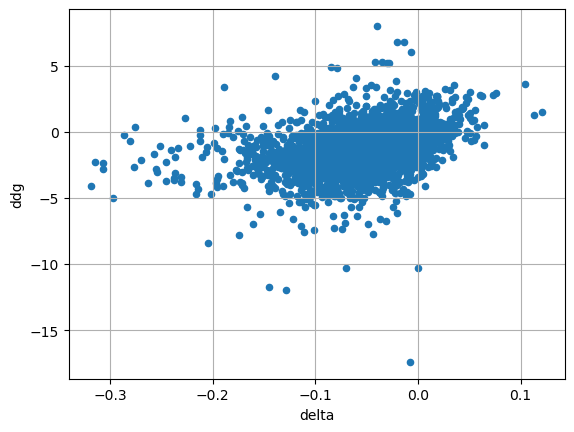

In [48]:
plain_esmif_plot= esmif_df.plot.scatter(x="delta", y="ddg", grid=True)
esmif_df[["ddg", "delta"]].corr()

In [49]:
def anti(x):
    #_anti = deepcopy(x)
    x['to_aa'], x['from_aa']  =  x['from_aa'], x['to_aa']
    x['ll_mut'], x['ll_native']  =  x['ll_native'], x['ll_mut']
    x['ddg'] = -x['ddg']
    x['delta'] = -x['delta']
    return x

anti_df = deepcopy(esmif_df).apply(anti, axis=1)

In [50]:
anti_df.head()

,chain,position,from_aa,to_aa,ddg,ll_native,ll_mut,delta
pdb_code,,,,,,,,
1a23,A,32,L,H,-5.30,-1.857081,-1.814687,0.042393
1a23,A,32,S,H,-5.20,-1.844672,-1.814687,0.029984
1a23,A,32,Y,H,-6.80,-1.834913,-1.814687,0.020226
1a43,A,156,A,G,2.40,-1.595537,-1.505268,0.090269
1a43,A,159,D,E,4.55,-1.601663,-1.505268,0.096395


In [51]:
double_df = pandas.concat([esmif_df,anti_df],ignore_index=True)
assert len(double_df) == 2* len(esmif_df)
double_df

,chain,position,from_aa,to_aa,ddg,ll_native,ll_mut,delta
0,A,32,H,L,5.30,-1.814687,-1.857081,-0.042393
1,A,32,H,S,5.20,-1.814687,-1.844672,-0.029984
2,A,32,H,Y,6.80,-1.814687,-1.834913,-0.020226
3,A,156,G,A,-2.40,-1.505268,-1.595537,-0.090269
4,A,159,E,D,-4.55,-1.505268,-1.601663,-0.096395
...,...,...,...,...,...,...,...,...
6537,A,36,S,G,0.70,-1.304181,-1.091251,0.212930
6538,A,37,A,G,3.01,-1.346041,-1.091251,0.254790
6539,A,37,D,G,1.70,-1.349016,-1.091251,0.257765
6540,A,4,L,F,2.20,-1.230052,-1.091251,0.138800


,ddg,delta
ddg,1.000000,0.617579
delta,0.617579,1.000000


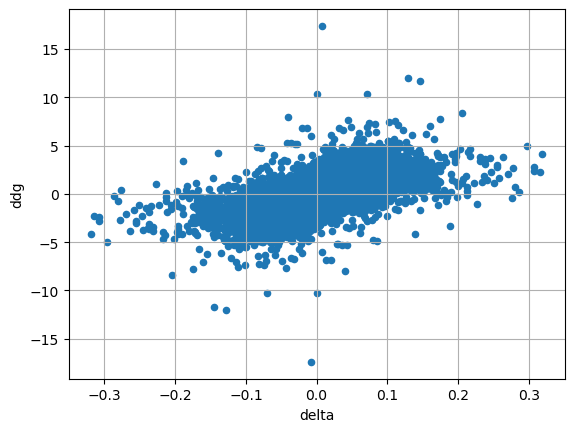

In [52]:
plain_double_plot= double_df.plot.scatter(x="delta", y="ddg", grid=True)
double_df[["ddg", "delta"]].corr()

# Rose

In [53]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [54]:
X = double_df["delta"].to_numpy().reshape(-1, 1)
y = double_df["ddg"].to_numpy()
X.shape, y.shape

((6542, 1), (6542,))

### Scaled ESM-IF

In [55]:
lin = LinearRegression(fit_intercept=False).fit(
    X,
    y,
)

In [56]:
import math

lin.coef_, lin.intercept_, math.sqrt(lin.score(X, y))

(array([18.1892629]), 0.0, 0.617578570071395)

In [57]:
scaled_esmif_df = deepcopy(double_df)
scale_coef=lin.coef_[0]
scaled_esmif_df['scaled_esmif']=scale_coef*scaled_esmif_df['delta']
#scaled_pythia_df.head()
print ('scaled train RMSE:',math.sqrt(mean_squared_error(scaled_esmif_df['ddg'],scaled_esmif_df['scaled_esmif'])))

scaled train RMSE: 1.5512722405983137


### compute Rose instead of ddMBC

In [58]:
rose=pandas.read_csv('rose1985.csv', index_col='Parameter')
rose

,Rose1985
Parameter,
A,86.6
C,132.3
D,97.8
E,113.9
F,194.1
G,62.9
H,155.8
I,158.0
K,115.5


In [59]:
rose['Rose1985']['A']

86.6

In [60]:
kd = {
    "A": 1.800,
    "R": -4.500,
    "N": -3.500,
    "D": -3.500,
    "C": 2.500,
    "Q": -3.500,
    "E": -3.500,
    "G": -0.400,
    "H": -3.200,
    "I": 4.500,
    "L": 3.800,
    "K": -3.900,
    "M": 1.900,
    "F": 2.800,
    "P": -1.600,
    "S": -0.800,
    "T": -0.700,
    "W": -0.900,
    "Y": -1.300,
    "V": 4.200,
}

In [61]:
#esmif_df.head()
def rose_delta(x):
    x['rose_delta']=rose['Rose1985'][x['from_aa']] - rose['Rose1985'][x['to_aa']]
    return x
ddfep_df = double_df.apply(rose_delta, 
               axis=1
              )

In [62]:
ddfep_df

,chain,position,from_aa,to_aa,ddg,ll_native,ll_mut,delta,rose_delta
0,A,32,H,L,5.30,-1.814687,-1.857081,-0.042393,-8.3
1,A,32,H,S,5.20,-1.814687,-1.844672,-0.029984,70.2
2,A,32,H,Y,6.80,-1.814687,-1.834913,-0.020226,-21.9
3,A,156,G,A,-2.40,-1.505268,-1.595537,-0.090269,-23.7
4,A,159,E,D,-4.55,-1.505268,-1.601663,-0.096395,16.1
...,...,...,...,...,...,...,...,...,...
6537,A,36,S,G,0.70,-1.304181,-1.091251,0.212930,22.7
6538,A,37,A,G,3.01,-1.346041,-1.091251,0.254790,23.7
6539,A,37,D,G,1.70,-1.349016,-1.091251,0.257765,34.9
6540,A,4,L,F,2.20,-1.230052,-1.091251,0.138800,-30.0


In [63]:
X_fep= ddfep_df[['delta','rose_delta']].to_numpy()

In [64]:
ddfep_model = LinearRegression(fit_intercept=True).fit(
    X_fep,
    y,
)

In [65]:
ddfep_model.coef_, ddfep_model.intercept_, math.sqrt(ddfep_model.score(X_fep, y))

(array([ 1.61496921e+01, -1.10137052e-02]), 0.0, 0.6737418768675068)

In [66]:
ddfep_df['ddfep']=ddfep_model.predict(X_fep)

1.4575018881531978

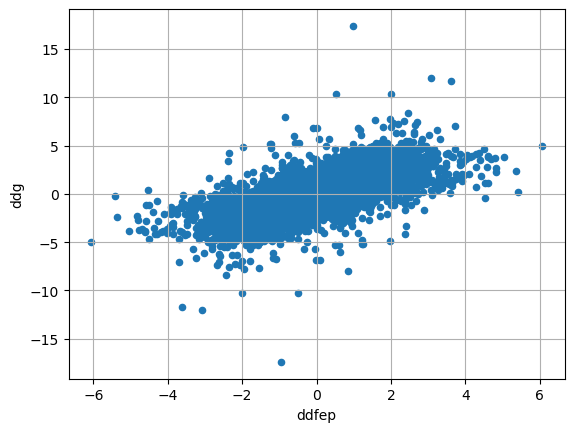

In [67]:
ddfep_plot= ddfep_df.plot.scatter(x='ddfep',y='ddg', grid=True)

math.sqrt(mean_squared_error(ddfep_df['ddg'],ddfep_df['ddfep']))

In [68]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
rsq=cross_val_score(LinearRegression(fit_intercept=True),
                   X_fep,y,
                   cv=RepeatedStratifiedKFold(n_splits=5,
                                              n_repeats=10,
                                              #shuffle=True,
                                             ).split(X_fep, y > 0))
rsq

array([0.44568993, 0.43005572, 0.48039915, 0.45172048, 0.46350597,
       0.44677367, 0.45396637, 0.43573781, 0.45226068, 0.47984837,
       0.46287841, 0.41676682, 0.45331891, 0.4526451 , 0.48006034,
       0.49078995, 0.43532346, 0.42758651, 0.43773747, 0.47673404,
       0.47361978, 0.42743484, 0.44965555, 0.50310827, 0.41268203,
       0.49193772, 0.44579774, 0.43813128, 0.43963304, 0.45668772,
       0.45622718, 0.46047384, 0.43035012, 0.43343577, 0.4863543 ,
       0.49854576, 0.44863134, 0.48265501, 0.41922032, 0.41249349,
       0.42969666, 0.45595319, 0.43578252, 0.4828274 , 0.46325017,
       0.41364625, 0.47956018, 0.46181323, 0.43886369, 0.47545762])

In [69]:
math.sqrt(rsq.mean())

0.6734645524671251

In [70]:
sum([math.sqrt(_) for _ in rsq])/len(rsq)


0.6732381773211096

## ddFEP w. optimized aa. DG(aq)

In [71]:
ddfep_opt = deepcopy(double_df)
for _ in sorted(kd.keys()):
    ddfep_opt[_] = 0
ddfep_opt

,chain,position,from_aa,to_aa,ddg,ll_native,ll_mut,delta,A,C,...,M,N,P,Q,R,S,T,V,W,Y
0,A,32,H,L,5.30,-1.814687,-1.857081,-0.042393,0,0,...,0,0,0,0,0,0,0,0,0,0
1,A,32,H,S,5.20,-1.814687,-1.844672,-0.029984,0,0,...,0,0,0,0,0,0,0,0,0,0
2,A,32,H,Y,6.80,-1.814687,-1.834913,-0.020226,0,0,...,0,0,0,0,0,0,0,0,0,0
3,A,156,G,A,-2.40,-1.505268,-1.595537,-0.090269,0,0,...,0,0,0,0,0,0,0,0,0,0
4,A,159,E,D,-4.55,-1.505268,-1.601663,-0.096395,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6537,A,36,S,G,0.70,-1.304181,-1.091251,0.212930,0,0,...,0,0,0,0,0,0,0,0,0,0
6538,A,37,A,G,3.01,-1.346041,-1.091251,0.254790,0,0,...,0,0,0,0,0,0,0,0,0,0
6539,A,37,D,G,1.70,-1.349016,-1.091251,0.257765,0,0,...,0,0,0,0,0,0,0,0,0,0
6540,A,4,L,F,2.20,-1.230052,-1.091251,0.138800,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
def encode_mutation(x):
    x[x['from_aa']]= -1
    x[x['to_aa']] = 1
    return x

In [73]:
ddfep_opt = ddfep_opt.apply(encode_mutation, axis='columns')

In [74]:
### fit test

In [75]:
X_optfep= ddfep_opt[['delta']+sorted(kd.keys())].to_numpy()
X_optfep.shape

(6542, 21)

In [76]:
dd_optfep_model = LinearRegression(fit_intercept=True).fit(
    X_optfep,
    y,
)

In [77]:
dd_optfep_model.coef_, dd_optfep_model.intercept_, math.sqrt(dd_optfep_model.score(X_optfep, y))

(array([16.16561359, -0.34366738,  0.16327681, -0.72454545, -0.27281635,
         0.40474471, -0.74782801, -0.38724922,  0.81059475, -0.43708928,
         0.66801589,  0.53828871, -0.36865393, -0.09195675, -0.28897946,
         0.23990634, -0.68022353, -0.40292087,  0.3278705 ,  0.93604634,
         0.6571862 ]),
 0.0,
 0.6937841256825152)

#### ddMBC coefs

In [78]:
coefs=dict(zip(["delta"] + sorted(kd.keys()), dd_optfep_model.coef_))
coefs

{'delta': 16.165613585193352,
 'A': -0.3436673829064738,
 'C': 0.163276808097711,
 'D': -0.7245454457504699,
 'E': -0.272816352692793,
 'F': 0.40474470996485234,
 'G': -0.7478280136097462,
 'H': -0.38724922029524217,
 'I': 0.8105947454263913,
 'K': -0.4370892823082324,
 'L': 0.6680158872732731,
 'M': 0.5382887101586262,
 'N': -0.3686539314187636,
 'P': -0.09195675079884456,
 'Q': -0.2889794599227879,
 'R': 0.2399063449987485,
 'S': -0.6802235340223245,
 'T': -0.4029208682438145,
 'V': 0.3278704980333529,
 'W': 0.9360463405674017,
 'Y': 0.6571861974491311}

In [79]:
coefs_df = pandas.DataFrame({'ESM-IF1': coefs})
coefs_df
#coefs_df.to_csv('esmif_params.csv')

,ESM-IF1
delta,16.165614
A,-0.343667
C,0.163277
D,-0.724545
E,-0.272816
F,0.404745
G,-0.747828
H,-0.387249
I,0.810595
K,-0.437089


In [80]:
ddfep_opt['ddfep_opt']=dd_optfep_model.predict(X_optfep)

RMSE: 1.4204537503586419


,ddg,ddfep_opt
ddg,1.000000,0.693784
ddfep_opt,0.693784,1.000000


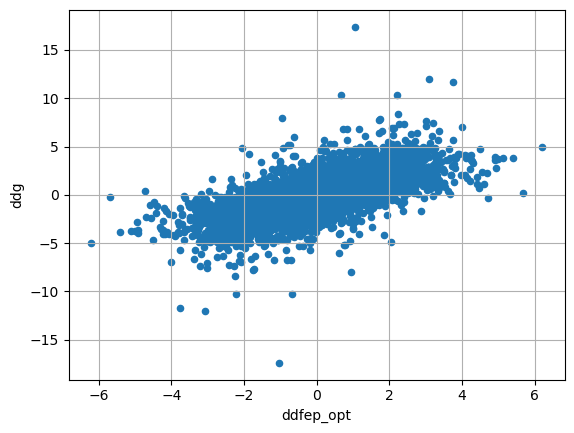

In [81]:
ddfep_opt_plot = ddfep_opt.plot.scatter(x='ddfep_opt',y='ddg', grid=True)

print('RMSE:',math.sqrt(mean_squared_error(ddfep_opt['ddg'],ddfep_opt['ddfep_opt'])))
ddfep_opt[['ddg','ddfep_opt']].corr()

#### compare w. rose

In [82]:
scales =pandas.DataFrame( {'ddFEP Scale': dd_optfep_model.coef_[1:]}, index=sorted(kd.keys()))
#scales['KD']=kd
scales

,ddFEP Scale
A,-0.343667
C,0.163277
D,-0.724545
E,-0.272816
F,0.404745
G,-0.747828
H,-0.387249
I,0.810595
K,-0.437089
L,0.668016


### Crossvalidate

In [83]:
optfep_rsq=cross_val_score(LinearRegression(fit_intercept=True),
                   X_optfep,y,
                   cv=RepeatedStratifiedKFold(n_splits=5,
                                              n_repeats=10,
                                              #shuffle=True,
                                             ).split(X_optfep, y > 0))
optfep_rsq

array([0.44498264, 0.47104013, 0.50497462, 0.48005642, 0.48060791,
       0.47022882, 0.51048298, 0.46378384, 0.47349049, 0.47810121,
       0.49030776, 0.45975318, 0.50286326, 0.50477147, 0.42800537,
       0.49355376, 0.44611318, 0.50478475, 0.48264926, 0.4604256 ,
       0.49096064, 0.49485682, 0.46214995, 0.46728261, 0.47105174,
       0.45616703, 0.50860709, 0.47410098, 0.49374813, 0.45753204,
       0.42391808, 0.50093149, 0.47468138, 0.50934908, 0.47447823,
       0.47955441, 0.46917105, 0.4867914 , 0.49615881, 0.45768276,
       0.4939063 , 0.46150964, 0.44185608, 0.47753666, 0.51246225,
       0.46257513, 0.48689885, 0.43157435, 0.50907566, 0.48296162])

In [84]:
math.sqrt(optfep_rsq.mean())

0.6908039798699034

In [85]:
sum([math.sqrt(_) for _ in optfep_rsq])/len(optfep_rsq)


0.6906152580648027

## Test on S669

In [86]:
esmif_s669_df = pandas.read_csv('../ESM-IF/esmif_s669_fixed.csv', index_col=1).drop("Unnamed: 0.1", axis=1)
esmif_s669_df= pandas.concat([ esmif_s669_df, deepcopy(esmif_s669_df).apply(anti, axis=1)], ignore_index=True)
esmif_s669_df

,ddg,pdb_code,chain,position,from_aa,to_aa,ll_native,ll_mut,delta
0,-1.800,1a0f,A,11,S,A,-0.897660,-0.916243,-0.018583
1,-2.690,1a7v,A,104,A,H,-0.891637,-0.954156,-0.062519
2,-0.600,1a7v,A,13,K,H,-0.891637,-0.912219,-0.020582
3,-2.880,1a7v,A,20,K,H,-0.891637,-0.941380,-0.049742
4,-1.360,1a7v,A,3,D,H,-0.891637,-0.954395,-0.062758
...,...,...,...,...,...,...,...,...,...
1271,1.440,5jxb,A,329,P,D,-1.708549,-1.677519,0.031030
1272,2.990,5oaq,A,429,H,Y,-1.558999,-1.536656,0.022343
1273,0.378,5vp3,A,128,G,S,-1.307405,-1.274585,0.032821
1274,-0.354,5vp3,A,183,T,V,-1.296933,-1.274585,0.022349


In [93]:
esmif_s669_df=esmif_s669_df.apply(rose_delta,axis=1)
esmif_s669_df.head()

,ddg,pdb_code,chain,position,from_aa,to_aa,ll_native,ll_mut,delta,A,...,N,P,Q,R,S,T,V,W,Y,rose_delta
0,-1.80,1a0f,A,11,S,A,-0.897660,-0.916243,-0.018583,1,...,0,0,0,0,-1,0,0,0,0,-1.0
1,-2.69,1a7v,A,104,A,H,-0.891637,-0.954156,-0.062519,-1,...,0,0,0,0,0,0,0,0,0,-69.2
2,-0.60,1a7v,A,13,K,H,-0.891637,-0.912219,-0.020582,0,...,0,0,0,0,0,0,0,0,0,-40.3
3,-2.88,1a7v,A,20,K,H,-0.891637,-0.941380,-0.049742,0,...,0,0,0,0,0,0,0,0,0,-40.3
4,-1.36,1a7v,A,3,D,H,-0.891637,-0.954395,-0.062758,0,...,0,0,0,0,0,0,0,0,0,-58.0


In [94]:
for _ in sorted(kd.keys()):
    esmif_s669_df[_] = 0
esmif_s669_df= esmif_s669_df.apply(encode_mutation, axis='columns')
esmif_s669_df

,ddg,pdb_code,chain,position,from_aa,to_aa,ll_native,ll_mut,delta,A,...,N,P,Q,R,S,T,V,W,Y,rose_delta
0,-1.800,1a0f,A,11,S,A,-0.897660,-0.916243,-0.018583,1,...,0,0,0,0,-1,0,0,0,0,-1.0
1,-2.690,1a7v,A,104,A,H,-0.891637,-0.954156,-0.062519,-1,...,0,0,0,0,0,0,0,0,0,-69.2
2,-0.600,1a7v,A,13,K,H,-0.891637,-0.912219,-0.020582,0,...,0,0,0,0,0,0,0,0,0,-40.3
3,-2.880,1a7v,A,20,K,H,-0.891637,-0.941380,-0.049742,0,...,0,0,0,0,0,0,0,0,0,-40.3
4,-1.360,1a7v,A,3,D,H,-0.891637,-0.954395,-0.062758,0,...,0,0,0,0,0,0,0,0,0,-58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,1.440,5jxb,A,329,P,D,-1.708549,-1.677519,0.031030,0,...,0,-1,0,0,0,0,0,0,0,-4.9
1272,2.990,5oaq,A,429,H,Y,-1.558999,-1.536656,0.022343,0,...,0,0,0,0,0,0,0,0,1,-21.9
1273,0.378,5vp3,A,128,G,S,-1.307405,-1.274585,0.032821,0,...,0,0,0,0,1,0,0,0,0,-22.7
1274,-0.354,5vp3,A,183,T,V,-1.296933,-1.274585,0.022349,0,...,0,0,0,0,0,-1,1,0,0,-34.5


In [95]:
X_s669=esmif_s669_df[['delta']+sorted(kd.keys())].to_numpy()
X_s669_rose=esmif_s669_df[['delta','rose_delta']].to_numpy()
y_s669=esmif_s669_df['ddg'].to_numpy()

In [96]:
esmif_s669_df['ddfep_rose']=ddfep_model.predict(X_s669_rose)

In [98]:
esmif_s669_df['ddfep_opt']=dd_optfep_model.predict(X_s669)

In [99]:
esmif_s669_df.head()

,ddg,pdb_code,chain,position,from_aa,to_aa,ll_native,ll_mut,delta,A,...,Q,R,S,T,V,W,Y,rose_delta,ddfep_rose,ddfep_opt
0,-1.80,1a0f,A,11,S,A,-0.897660,-0.916243,-0.018583,1,...,0,0,-1,0,0,0,0,-1.0,-0.289103,0.036143
1,-2.69,1a7v,A,104,A,H,-0.891637,-0.954156,-0.062519,-1,...,0,0,0,0,0,0,0,-69.2,-0.247509,-1.054235
2,-0.60,1a7v,A,13,K,H,-0.891637,-0.912219,-0.020582,0,...,0,0,0,0,0,0,0,-40.3,0.111462,-0.282878
3,-2.88,1a7v,A,20,K,H,-0.891637,-0.941380,-0.049742,0,...,0,0,0,0,0,0,0,-40.3,-0.359470,-0.754274
4,-1.36,1a7v,A,3,D,H,-0.891637,-0.954395,-0.062758,0,...,0,0,0,0,0,0,0,-58.0,-0.374720,-0.677217


0.566179865415468

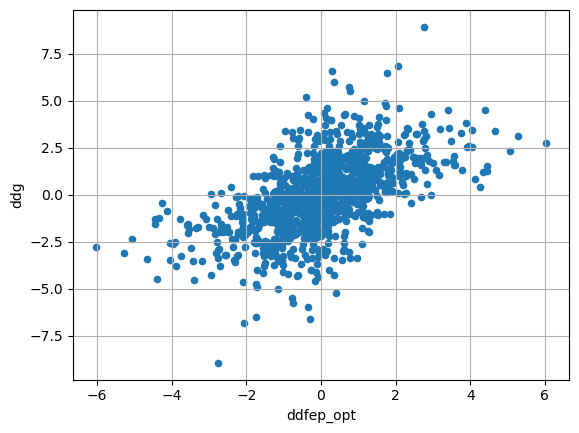

In [100]:
esmif_s669_plot = esmif_s669_df.plot.scatter(x='ddfep_opt',y='ddg', grid=True)

math.sqrt(dd_optfep_model.score(X_s669, y_s669))

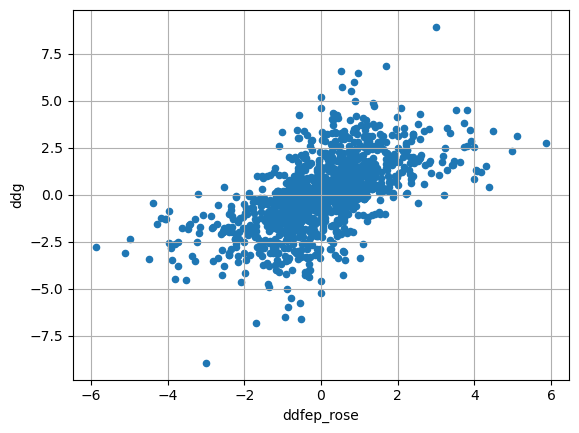

In [101]:
esmif_s669_rose_plot = esmif_s669_df.plot.scatter(x='ddfep_rose',y='ddg', grid=True)

#math.sqrt(dd_optfep_model.score(X_s669, y_s669))

In [103]:
for _ in ['ddfep_opt','ddfep_rose']:
    print('S669', _, math.sqrt(mean_squared_error(esmif_s669_df['ddg'],esmif_s669_df[_])))

S669 ddfep_opt 1.5642172187698047
S669 ddfep_rose 1.5457025289273703


In [102]:
esmif_s669_df[['ddg','ddfep_opt','ddfep_rose']].corr()

,ddg,ddfep_opt,ddfep_rose
ddg,1.000000,0.585352,0.59239
ddfep_opt,0.585352,1.000000,0.97249
ddfep_rose,0.592390,0.972490,1.00000


In [44]:
# only esmi-if
esmif_s669_df[['ddg','delta']].corr()

,ddg,delta
ddg,1.00000,0.53355
delta,0.53355,1.00000


## S461 

In [104]:
s461_df=pandas.read_csv('../ESM-IF/S461.mut',sep=' ')

In [105]:
## extract mutations to simpler csv
s461_mutations = pandas.DataFrame(s461_df['ddg'])
s461_mutations['pdb_code'] = s461_df['pdb'].apply(lambda x: x[:4].lower())
s461_mutations['chain'] = s461_df['pdb'].apply(lambda x: x[-1].upper())
s461_mutations['position'] = s461_df['mut'].apply(lambda x: int(x[1:-1]))
s461_mutations['from_aa'] = s461_df['mut'].apply(lambda x: x[0].upper())
s461_mutations['to_aa'] = s461_df['mut'].apply(lambda x: x[-1].upper())
s461_mutations

,ddg,pdb_code,chain,position,from_aa,to_aa
0,-1.800,1a0f,A,11,S,A
1,-1.745,1ba3,A,461,H,D
2,0.287,1ba3,A,489,H,D
3,-0.287,1ba3,A,489,H,K
4,-0.263,1ba3,A,489,H,M
...,...,...,...,...,...,...
456,0.060,4he7,A,19,A,G
457,-0.460,4he7,A,19,A,K
458,-1.440,5jxb,A,329,D,G
459,-1.440,5jxb,A,329,D,P


In [106]:
def mut_hash(x):
    #return '_'.join([x['pdb_code'],x['chain'],str(x['position']),x['from_aa'],x['to_aa']])
    return '_'.join([x['pdb_code'],x['chain'],str(x['position'])])
    
s461_hashes=set(s461_mutations.apply(mut_hash, axis=1))

In [107]:
esmif_s669_df['s461']=esmif_s669_df.apply(lambda x: mut_hash(x) in s461_hashes,axis=1)
esmif_s669_df

,ddg,pdb_code,chain,position,from_aa,to_aa,ll_native,ll_mut,delta,A,...,R,S,T,V,W,Y,rose_delta,ddfep_rose,ddfep_opt,s461
0,-1.800,1a0f,A,11,S,A,-0.897660,-0.916243,-0.018583,1,...,0,-1,0,0,0,0,-1.0,-0.289103,0.036143,True
1,-2.690,1a7v,A,104,A,H,-0.891637,-0.954156,-0.062519,-1,...,0,0,0,0,0,0,-69.2,-0.247509,-1.054235,False
2,-0.600,1a7v,A,13,K,H,-0.891637,-0.912219,-0.020582,0,...,0,0,0,0,0,0,-40.3,0.111462,-0.282878,False
3,-2.880,1a7v,A,20,K,H,-0.891637,-0.941380,-0.049742,0,...,0,0,0,0,0,0,-40.3,-0.359470,-0.754274,False
4,-1.360,1a7v,A,3,D,H,-0.891637,-0.954395,-0.062758,0,...,0,0,0,0,0,0,-58.0,-0.374720,-0.677217,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,1.440,5jxb,A,329,P,D,-1.708549,-1.677519,0.031030,0,...,0,0,0,0,0,0,-4.9,0.555086,-0.130976,True
1272,2.990,5oaq,A,429,H,Y,-1.558999,-1.536656,0.022343,0,...,0,0,0,0,0,1,-21.9,0.602029,1.405620,True
1273,0.378,5vp3,A,128,G,S,-1.307405,-1.274585,0.032821,0,...,0,1,0,0,0,0,-22.7,0.780054,0.598170,False
1274,-0.354,5vp3,A,183,T,V,-1.296933,-1.274585,0.022349,0,...,0,0,-1,1,0,0,-34.5,0.740898,1.092072,False


In [108]:
esmif_s461_df=esmif_s669_df[esmif_s669_df['s461']]
len(esmif_s461_df)

870

### ddMBC

RMSE: 1.2530722540602852


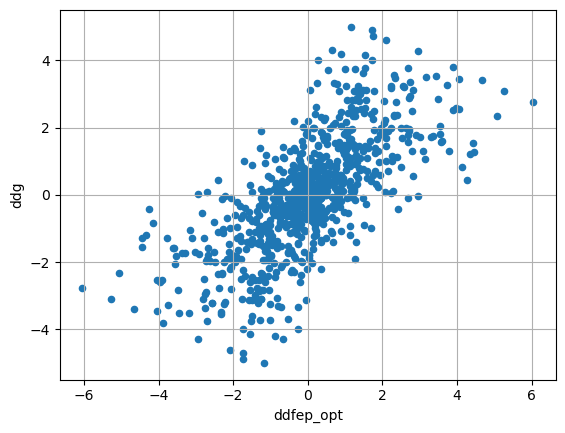

In [111]:
esmif_s461_plot = esmif_s461_df.plot.scatter(x="ddfep_opt", y="ddg", grid=True)

print(
    "RMSE:",
    math.sqrt(mean_squared_error(esmif_s461_df["ddg"], esmif_s461_df["ddfep_opt"])),
)

### Rose

Rose RMSE: 1.2235943742729696


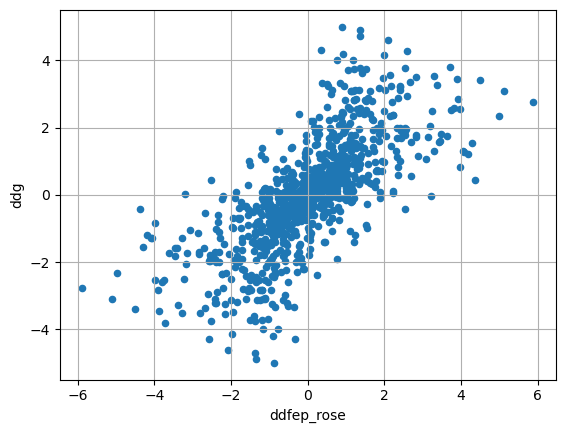

In [113]:
esmif_s461_rose_plot = esmif_s461_df.plot.scatter(x="ddfep_rose", y="ddg", grid=True)

print(
    "Rose RMSE:",
    math.sqrt(mean_squared_error(esmif_s461_df["ddg"], esmif_s461_df["ddfep_rose"])),
)

In [112]:
esmif_s461_df[['ddg','ddfep_opt','ddfep_rose']].corr()

,ddg,ddfep_opt,ddfep_rose
ddg,1.000000,0.702336,0.712540
ddfep_opt,0.702336,1.000000,0.980653
ddfep_rose,0.712540,0.980653,1.000000


In [68]:
# only esmi-if
esmif_s461_df[['ddg','delta']].corr()

,ddg,delta
ddg,1.000000,0.637964
delta,0.637964,1.000000
